In [1]:
import numpy as np
from Bio.SeqIO.FastaIO import SimpleFastaParser
from Bio.pairwise2 import format_alignment
from Bio import pairwise2
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

In [17]:
aav_gen = []
aav_caps = []
parvo_caps = []

In [18]:
with open("aav_one.fasta") as in_handle:
    for title, seq in SimpleFastaParser(in_handle):
        aav_gen.append(seq)

In [19]:
with open("500_uniprot_aav__clean.fasta") as in_handle:
    for title, seq in SimpleFastaParser(in_handle):
        aav_caps.append(seq)

In [20]:
with open("pashas5121024.fasta") as in_handle:
    for title, seq in SimpleFastaParser(in_handle):
        parvo_caps.append(seq)

In [33]:
aav_one_dist = np.loadtxt('aav_one_col.mat')
aav_train_dist = np.loadtxt('aav_train_col.mat')
capsids_dist = np.loadtxt('capsids_col.mat')

(64, 64)


In [85]:
all_dist = np.loadtxt('data_col.mat')
all_dist.shape

(4988, 4988)

In [101]:
only_aav_dist = np.loadtxt('only_aav_col.mat')
only_aav_dist.shape

(678, 678)

In [105]:
only_aav_10_dist = np.loadtxt('only_aav_10_col.mat')

(688, 688)

In [7]:
finish = np.loadtxt('finish_col.mat')
finish.shape

(688, 688)

In [22]:
aav_one_dist_emb = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(aav_one_dist)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [34]:
aav_train_dist_emb = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(aav_train_dist)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [35]:
capsids_dist_emb = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(capsids_dist)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [86]:
all_emb = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(all_dist)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [102]:
only_aav_emb = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(only_aav_dist)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [106]:
only_aav_10_emb = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(only_aav_10_dist)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [8]:
finished = TSNE(n_components = 2, learning_rate = 'auto', n_iter = 1000).fit_transform(finish)

/Users/evgeny/.conda/envs/code/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [58]:
print(aav_one_dist_emb.shape, aav_train_dist_emb.shape, capsids_dist_emb.shape)

(64, 2) (614, 2) (4310, 2)


In [79]:
all_the_data = np.vstack((aav_one_dist_emb, aav_train_dist_emb, capsids_dist_emb))
only_aav = np.vstack((aav_one_dist_emb, aav_train_dist_emb))

In [26]:
labone = np.zeros(64)
labtrain = np.ones(614)
labcap = np.array([2.] * 4310)
bio10 = np.array([2.] * 10)
all_the_data_labels = np.concatenate((labone, labtrain, labcap))
aav_labels = np.concatenate((labone, labtrain))
aav_labels_10 = np.concatenate((labone, labtrain, bio10))
labone[54] = 3
labone[62] = 4
labone[25] = 5
aav_labels_10_interested = np.concatenate((labone, labtrain, bio10))

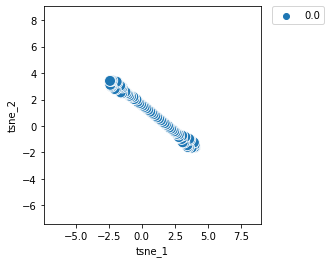

In [72]:
tsne_result_df = pd.DataFrame({'tsne_1': aav_one_dist_emb[:,0], 'tsne_2': aav_one_dist_emb[:,1], 'label': labone})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (aav_one_dist_emb.min()-5, aav_one_dist_emb.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

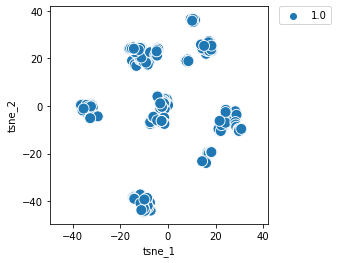

In [73]:
tsne_result_df = pd.DataFrame({'tsne_1': aav_train_dist_emb[:,0], 'tsne_2': aav_train_dist_emb[:,1], 'label': labtrain})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (aav_train_dist_emb.min()-5, aav_train_dist_emb.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

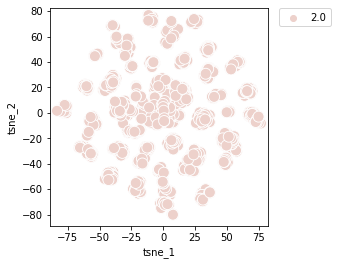

In [74]:
tsne_result_df = pd.DataFrame({'tsne_1': capsids_dist_emb[:,0], 'tsne_2': capsids_dist_emb[:,1], 'label': labcap})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (capsids_dist_emb.min()-5, capsids_dist_emb.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

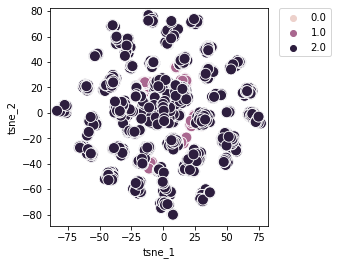

In [82]:
tsne_result_df = pd.DataFrame({'tsne_1': all_the_data[:,0], 'tsne_2': all_the_data[:,1], 'label': all_the_data_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (all_the_data.min()-5, all_the_data.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

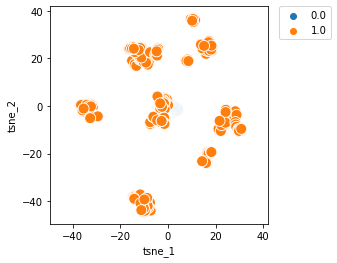

In [83]:
tsne_result_df = pd.DataFrame({'tsne_1': only_aav[:,0], 'tsne_2': only_aav[:,1], 'label': aav_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (only_aav.min()-5, only_aav.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

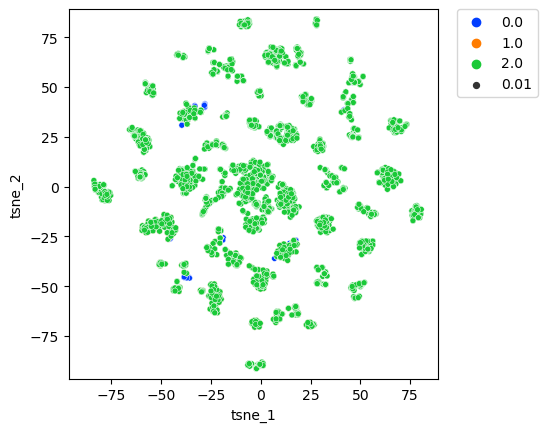

In [100]:
tsne_result_df = pd.DataFrame({'tsne_1': all_emb[:,0], 'tsne_2': all_emb[:,1], 'label': all_the_data_labels})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, size = 0.01, palette = "bright")
lim = (all_emb.min()-5, all_emb.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

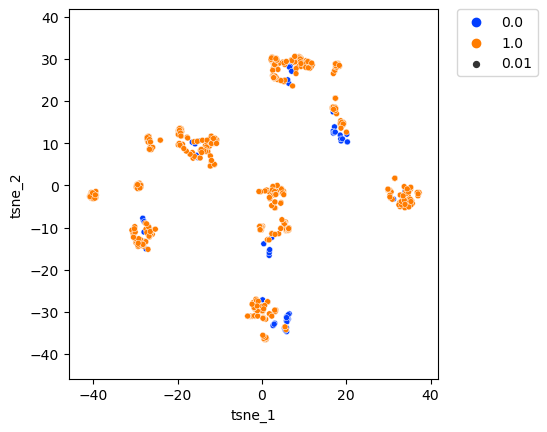

In [103]:
tsne_result_df = pd.DataFrame({'tsne_1': only_aav_emb[:,0], 'tsne_2': only_aav_emb[:,1], 'label': aav_labels})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, size = 0.01, palette = "bright")
lim = (only_aav_emb.min()-5, only_aav.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

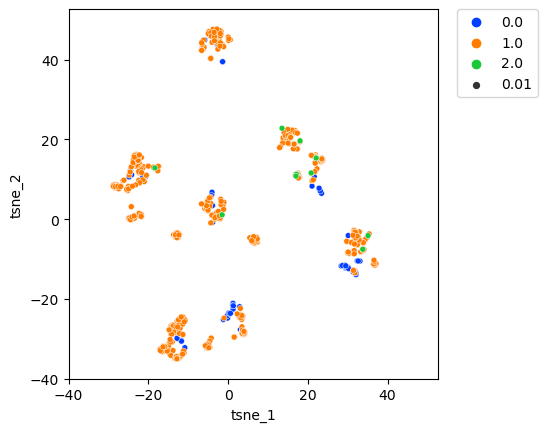

In [107]:
tsne_result_df = pd.DataFrame({'tsne_1': only_aav_10_emb[:,0], 'tsne_2': only_aav_10_emb[:,1], 'label': aav_labels_10})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, size = 0.01, palette = "bright")
lim = (only_aav_10_emb.min()-5, only_aav_10_emb.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

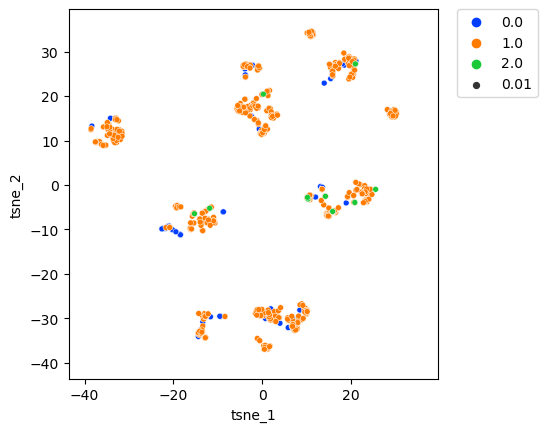

In [9]:
tsne_result_df = pd.DataFrame({'tsne_1': finished[:,0], 'tsne_2': finished[:,1], 'label': aav_labels_10})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120, size = 0.01, palette = "bright")
lim = (finished.min()-5, finished.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

<BarContainer object of 11 artists>

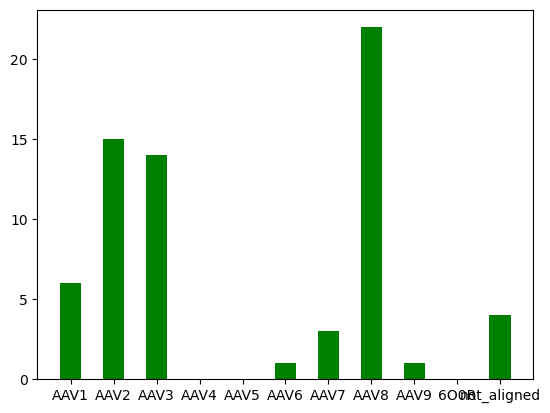

In [16]:
histo = {"AAV1" : 6, "AAV2": 15, "AAV3": 14, "AAV4" :0, "AAV5": 0, "AAV6": 1, "AAV7": 3, "AAV8": 22, "AAV9": 1, "6O0R": 0, "not_aligned" : 4}
plt.bar(histo.keys(), histo.values(), 0.5, color='g')

"to fold:"
39: 97 to aav2, 87 to aav3, same length
62: 92 to aav2, 537 length
54: 92 to aav3, 532 length
41: 93 to aav8, 738 length
25: 87 to aav6, 736 length

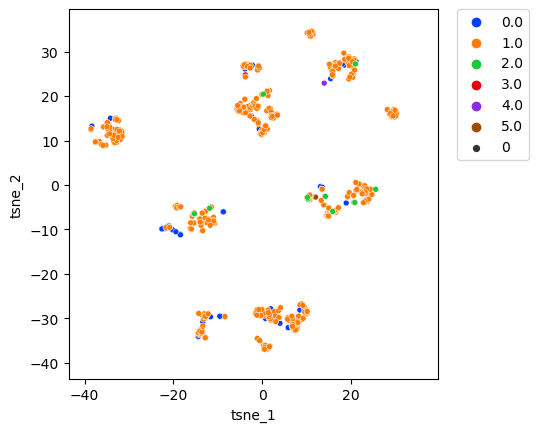

In [30]:
tsne_result_df = pd.DataFrame({'tsne_1': finished[:,0], 'tsne_2': finished[:,1], 'label': aav_labels_10_interested})
fig, ax = plt.subplots(1)
mpl.style.use('default')
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, size = 0, ax=ax,s=120, palette = "bright")
lim = (finished.min()-5, finished.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)